<a href="https://colab.research.google.com/github/Hirva-Bhagat/GooglePlaceReviewScraper/blob/master/Naive%20Bayes%20Text%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd 
data =  pd.read_csv('/content/drive/My Drive/TWWReviews.csv', sep = '\t', names = ['UserName', 'Reviews'])
data.head()

,UserName,Reviews
0,"UserName,Reviews,Rating,Date",NaN
1,"Justine Soucy,""THIS IS MY HAPPY PLACE. I've be...",NaN
2,"The decor, ambiance, music, and details are al...",NaN
3,"The best thing ever for a fan …"", 5 stars ,3 m...",NaN
4,"Nathan Estes,""Extra ordinary place to hangout ...",NaN


In [10]:
text = data['Reviews']
label = data['UserName']

In [11]:
#Number of Words
#x = lambda a : a + 10
#print(x(5))
data['word_count'] = data['Reviews'].apply(lambda x: len(str(x).split(" ")))
data[['Reviews','word_count']].head()

,Reviews,word_count
0,NaN,1
1,NaN,1
2,NaN,1
3,NaN,1
4,NaN,1


In [14]:
#Number of characters
data['char_count'] = data['UserName'].str.len() ## this also includes spaces
data[['Reviews','char_count']].head()

,Reviews,char_count
0,NaN,28
1,NaN,145
2,NaN,76
3,NaN,55
4,NaN,217


In [17]:
#Average Word Length
def avg_word(sentence):
  words = sentence.split()
  #print(words)
  return (sum(len(word) for word in words)/len(words))

data['avg_word'] = data['UserName'].apply(lambda x: avg_word(x))
data[['UserName','avg_word']].head()

,UserName,avg_word
0,"UserName,Reviews,Rating,Date",28.000000
1,"Justine Soucy,""THIS IS MY HAPPY PLACE. I've be...",5.041667
2,"The decor, ambiance, music, and details are al...",4.846154
3,"The best thing ever for a fan …"", 5 stars ,3 m...",3.307692
4,"Nathan Estes,""Extra ordinary place to hangout ...",4.736842


In [26]:
import nltk,csv,numpy
from nltk import sent_tokenize, word_tokenize, pos_tag
sentences=[]
reader = pd.read_csv('/content/drive/My Drive/TWWReviews.csv', sep = ',', names = ['Reviews','Rating'])

text = reader['Reviews']
class_label = reader['Rating']

[['THIS', 'IS', 'MY', 'HAPPY', 'PLACE.', "I've", 'been', 'wanting', 'to', 'visit', 'Hogwarts', 'ever', 'since', 'it', 'was', 'announced', 'that', 'this', 'theme', 'park', 'was', 'in', 'construction.', '\n\nThe', 'decor,', 'ambiance,', 'music,', 'and', 'details', 'are', 'all', 'so', 'great', 'and', 'well', 'executed.', '\n\nThe', 'best', 'thing', 'ever', 'for', 'a', 'fan', '…'], ['Extra', 'ordinary', 'place', 'to', 'hangout', 'with', 'kids', 'with', 'numerous', 'rides', 'such', 'as', 'roller', 'coasters', '🎢,', 'pacific', 'wheel', 'and', 'many', 'more', 'to', 'enjoy', 'late', 'night.', 'It', 'also', 'has', 'many', 'delicious', 'food', '🥘', 'stalls.'], ['The', 'place', 'is', 'awesome', '!', 'Big', 'fan', 'of', 'the', 'whole', 'franchise', ',wish', 'I', 'could', 'be', 'there', 'again', 'some', 'time', 'soon', '!', '😝❤️'], ["I'm", 'not', 'enthusiastic', 'about', 'this', 'place', 'at', 'all.', "It's", 'super', 'basic;', 'I', 'would', 'give', 'it', 'a', '3', 'star', 'on', 'the', 'food', 'but

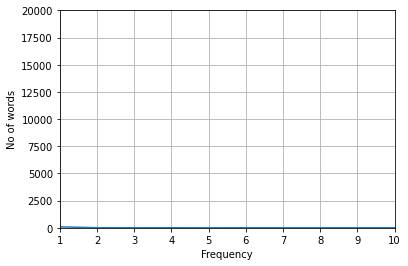

Number of words with frequency higher than cutoff frequency(5) : 10
Sklearn's score on training data : 0.8051643192488263
Sklearn's score on testing data : 0.7605633802816901
Classification report for testing data :-
              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        34
        good       0.76      1.00      0.86       108

    accuracy                           0.76       142
   macro avg       0.38      0.50      0.43       142
weighted avg       0.58      0.76      0.66       142

Our score on testing data : 0.7605633802816901
Classification report for testing data :-
              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        34
        good       0.76      1.00      0.86       108

    accuracy                           0.76       142
   macro avg       0.38      0.50      0.43       142
weighted avg       0.58      0.76      0.66       142

Score of our model on test data: 0.76056

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import os
import string
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

X = [] # an element of X is represented as (filename,text)
Y = [] # an element of Y represents the newsgroup category of the corresponding X element
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/TWWReviews.csv')
rev = df.Reviews
X=[]
for r in rev:
  x=r.split(" ")
  X.append(x)

rat = df.Rating
Y=[]
for y in rat:
  x = y.split(" ")
  if(int(x[1])>4):
    Y.append("good")
  else:
    Y.append("bad")


print(X)


X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=0)

stopwords = ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone',
             'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount',
             'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around',
             'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before',
             'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both',
             'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de',
             'describe', 'detail', 'did', 'do', 'does', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg',
             'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone',
             'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for',
             'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had',
             'has', 'hasnt', 'have', 'having', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed',
             'interest', 'into', 'is', 'it', 'its', 'itself', 'just', 'keep', 'last', 'latter', 'latterly', 'least', 'less',
             'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly',
             'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine',
             'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once',
             'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own',
             'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed', 'seeming',
             'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 
             'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system',
             't', 'take', 'ten', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there',
             'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thickv', 'thin', 'third', 'this',
             'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward',
             'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we',
             'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby',
             'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom',
             'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself',
             'yourselves']



vocab = {}
for i in range(len(X_train)):
    word_list = []
    for word in X_train[i][1].split():
        word_new  = word.strip(string.punctuation).lower()
        if (len(word_new)>2)  and (word_new not in stopwords):  
            if word_new in vocab:
                vocab[word_new]+=1
            else:
                vocab[word_new]=1            


num_words = [0 for i in range(max(vocab.values())+1)] 
freq = [i for i in range(max(vocab.values())+1)] 
for key in vocab:
    num_words[vocab[key]]+=1
plt.plot(freq,num_words)
plt.axis([1, 10, 0, 20000])
plt.xlabel("Frequency")
plt.ylabel("No of words")
plt.grid()
plt.show()


# In[7]:


cutoff_freq = 5
# For deciding cutoff frequency
num_words_above_cutoff = len(vocab)-sum(num_words[0:cutoff_freq]) 
print("Number of words with frequency higher than cutoff frequency({}) :".format(cutoff_freq),num_words_above_cutoff)


# In[8]:


# Words with frequency higher than cutoff frequency are chosen as features
# (i.e we remove words with low frequencies as they would not be significant )
features = []
for key in vocab:
    if vocab[key] >=cutoff_freq:
        features.append(key)


# In[9]:


# To represent training data as word vector counts
X_train_dataset = np.zeros((len(X_train),len(features)))
# This can take some time to complete
for i in range(len(X_train)):
    # print(i) # Uncomment to see progress
    word_list = [ word.strip(string.punctuation).lower() for word in X_train[i][1].split()]
    for word in word_list:
        if word in features:
            X_train_dataset[i][features.index(word)] += 1


# In[10]:


# To represent test data as word vector counts
X_test_dataset = np.zeros((len(X_test),len(features)))
# This can take some time to complete
for i in range(len(X_test)):
    # print(i) # Uncomment to see progress
    word_list = [ word.strip(string.punctuation).lower() for word in X_test[i][1].split()]
    for word in word_list:
        if word in features:
            X_test_dataset[i][features.index(word)] += 1


# In[11]:


# Using sklearn's Multinomial Naive Bayes
clf = MultinomialNB()
clf.fit(X_train_dataset,Y_train)
Y_test_pred = clf.predict(X_test_dataset)
sklearn_score_train = clf.score(X_train_dataset,Y_train)
print("Sklearn's score on training data :",sklearn_score_train)
sklearn_score_test = clf.score(X_test_dataset,Y_test)
print("Sklearn's score on testing data :",sklearn_score_test)
print("Classification report for testing data :-")
print(classification_report(Y_test, Y_test_pred))


# In[12]:


# Implementing Multinomial Naive Bayes from scratch
class MultinomialNaiveBayes:
    
    def __init__(self):
        # count is a dictionary which stores several dictionaries corresponding to each news category
        # each value in the subdictionary represents the freq of the key corresponding to that news category 
        self.count = {}
        # classes represents the different news categories
        self.classes = None
    
    def fit(self,X_train,Y_train):
        # This can take some time to complete       
        self.classes = set(Y_train)
        for class_ in self.classes:
            self.count[class_] = {}
            for i in range(len(X_train[0])):
                self.count[class_][i] = 0
            self.count[class_]['total'] = 0
            self.count[class_]['total_points'] = 0
        self.count['total_points'] = len(X_train)
        
        for i in range(len(X_train)):
            for j in range(len(X_train[0])):
                self.count[Y_train[i]][j]+=X_train[i][j]
                self.count[Y_train[i]]['total']+=X_train[i][j]
            self.count[Y_train[i]]['total_points']+=1
    
    def __probability(self,test_point,class_):
        
        log_prob = np.log(self.count[class_]['total_points']) - np.log(self.count['total_points'])
        total_words = len(test_point)
        for i in range(len(test_point)):
            current_word_prob = test_point[i]*(np.log(self.count[class_][i]+1)-np.log(self.count[class_]['total']+total_words))
            log_prob += current_word_prob
        
        return log_prob
    
    
    def __predictSinglePoint(self,test_point):
        
        best_class = None
        best_prob = None
        first_run = True
        
        for class_ in self.classes:
            log_probability_current_class = self.__probability(test_point,class_)
            if (first_run) or (log_probability_current_class > best_prob) :
                best_class = class_
                best_prob = log_probability_current_class
                first_run = False
                
        return best_class
        
  
    def predict(self,X_test):
        # This can take some time to complete
        Y_pred = [] 
        for i in range(len(X_test)):
        # print(i) # Uncomment to see progress
            Y_pred.append( self.__predictSinglePoint(X_test[i]) )
        
        return Y_pred
    
    def score(self,Y_pred,Y_true):
        # returns the mean accuracy
        count = 0
        for i in range(len(Y_pred)):
            if Y_pred[i] == Y_true[i]:
                count+=1
        return count/len(Y_pred)


# In[13]:


clf2 = MultinomialNaiveBayes()
clf2.fit(X_train_dataset,Y_train)
Y_test_pred = clf2.predict(X_test_dataset)
our_score_test = clf2.score(Y_test_pred,Y_test)  
print("Our score on testing data :",our_score_test)
print("Classification report for testing data :-")
print(classification_report(Y_test, Y_test_pred))


# In[14]:


print("Score of our model on test data:",our_score_test)
print("Score of inbuilt sklearn's MultinomialNB on the same data :",sklearn_score_test)